In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth',-1)

## Analysis of #StatueOfUnity Tweets

*Note: The dataset we are using has been manually procured from twitter using twitter-scraper.*

## Importing the data, having a feel for it

In [3]:
statue_data = pd.read_csv('./StatueofUnity - unity.csv')

In [4]:
statue_data.head()

,timestamp,url,text,user,html,retweets,replies,fullname,id,likes
0,2009-01-04T16:57:16,/cdunavant/status/1095373293,"QOTD: Even as a melody is not composed of tones, nor a verse of words, nor a statue of lines--one must pull and tear to turn a unity int ...",cdunavant,"<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""en"">QOTD: Even as a melody is not composed of tones, nor a verse of words, nor a <strong>statue of</strong> lines--one must pull and tear to turn a <strong>unity</strong> int ...</p>",0,0,Chris Dunavant,1.095373e+09,0
1,2010-07-27T06:09:21,/NessaLoves311/status/19635383549,@Unity_c7 @TroyBeast The east coast isn't that great just Obama and The Statue of liberty. I'd rather live in the west coast or Texas! :),NessaLoves311,"<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""en"">@<strong>Unity</strong>_c7 <a class=""twitter-atreply pretty-link js-nav"" data-mentioned-user-id=""76714507"" dir=""ltr"" href=""/TroyBeast""><s>@</s><b>TroyBeast</b></a> The east coast isn't that great just Obama and The <strong>Statue of</strong> liberty. I'd rather live in the west coast or Texas! :)</p>",0,0,V.,1.963538e+10,0
2,2010-07-21T22:40:20,/supercatdrugs/status/19110841454,@Capcom_Unity what's that other new stage with the Statue of Liberty in the background? #mvc3,supercatdrugs,"<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""en""><a class=""twitter-atreply pretty-link js-nav"" data-mentioned-user-id=""998706554646945792"" dir=""ltr"" href=""/Capcom_Unity""><s>@</s><b>Capcom_<strong>Unity</strong></b></a> what's that other new stage with the <strong>Statue of</strong> Liberty in the background? <a class=""twitter-hashtag pretty-link js-nav"" data-query-source=""hashtag_click"" dir=""ltr"" href=""/hashtag/mvc3?src=hash""><s>#</s><b>mvc3</b></a></p>",0,0,CAT DRUGS,1.911084e+10,0
3,2010-06-30T15:22:43,/guslifter311/status/17421634223,"@Unity_c7 brother aside from being cursed, having a statue of Satans Horse and the main terminal looking like a big tippee? What else haha?",guslifter311,"<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""en"">@<strong>Unity</strong>_c7 brother aside from being cursed, having a <strong>statue of</strong> Satans Horse and the main terminal looking like a big tippee? What else haha?</p>",0,0,Gus Chavez Jr,1.742163e+10,0
4,2010-06-26T18:02:13,/lillene_ebanks/status/17108147648,@TheOprahShow Will you help US preserve Michael Jackson's message of love and unity by placing a statue of him in Washington D.C.?,lillene_ebanks,"<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""en""><a class=""twitter-atreply pretty-link js-nav"" data-mentioned-user-id=""847530490097696768"" dir=""ltr"" href=""/theOprahshow""><s>@</s><b>TheOprahShow</b></a> Will you help US preserve Michael Jackson's message of love and <strong>unity</strong> by placing a <strong>statue of</strong> him in Washington D.C.?</p>",0,0,Lillene C. Luker,1.710815e+10,0


We'll first filter out the columns we require and check for missing values if any.

In [5]:
COLUMNS_TO_KEEP = ['retweets','likes','text']
data = statue_data[COLUMNS_TO_KEEP]

In [6]:
data.count()

retweets    2100
likes       2100
text        2100
dtype: int64

There seem to be a lot of duplicate rows, so let's first remove them.

In [7]:
data = data.drop_duplicates()

In [8]:
data.count()

retweets    517
likes       517
text        517
dtype: int64

In [9]:
data.to_excel('StatueOfUnity - corrected.xlsx')

In [10]:
data.sample()

,retweets,likes,text
344,1,0,Statue of Unity to be build on Narmada will be connected with Vadodra through metro rail & 6 lane highway..... pic.twitter.com/e78EuCaN


Ooh, LOTS of dulplicate rows. Well, let's begin the journey now.

## Uhm... That's some ugly data right there!

We plan to first have an a preliminary analysis and then, probably, we could see which tweets are the most popular(due to the user's popularity or the content of the tweet, or both), and then see what forms popular opinion.

Let's have a look at some sample tweets.

In [11]:
data.sample(20)

,retweets,likes,text
688,0,2,"@SamitLive Yes, If it is made in China, statue of Unity can be a matter of Shame for us. @simuntweets @timesofindia"
848,0,0,Sardar Patel Statue of Unity એકતાની પ્રતિમા Mr Editor: http://youtu.be/lhDT0ubXTZI?a via @YouTube
350,0,0,"Gujarat's Statue of Unity to cost a whopping Rs2,500 crore - Daily News & Analysis: Gujarat's Stat... http://bit.ly/KOjN09 Gujarat Times"
1788,0,0,Retweeted Smriti Z Irani (@smritiirani):\n\nWork on Statue of Unity moving full speed ahead. Salutations to 3000 strong Engineer and Labour team for their 24x7 Service. pic.twitter.com/iDV1CjI4fa
858,0,2,Good wishes for statue of unity...keep it up sir
27,0,0,"RT""@DeshGujarat: A new picture of proposed Statue of Unity http://deshgujarat.com/2013/10/22/a-new-picture-of-proposed-statue-of-unity/ …"""
502,0,0,That's the Harsh truth said by Lewis Hamilton! We would have literally built thousands of home at price of Indian GP. Statue of Unity is also one of the best example of spending useless Money. We have strong economy with poor human development index. Accept the truth.
362,5,1,"Metro Rail, 6-lane highway to connect Vadodara with Statue of Unity; To develop Narmada banks from SSP dam to... http://fb.me/1Q6G8hFSO"
835,0,0,Enjoying the Unity First Datra cruisd @ Statue of Liberty & Ellis Island https://www.instagram.com/p/BXRsFKyja3X/
1967,0,0,aap Jao phele talati mantri kaubhand or statue of unity kaubhand vale Se hisab mango karodo ka gotala kiya


Immediately, we see we can do some cleaning of this data:
- @mentions should be removed, since they don't add any value to the sentiments of the crowd.
- URLs should be removed.
- Hashtags should have their hashes removed.
- Stray characters such as \n, etc should be removed.

In [12]:
data.text.head(10)

0    QOTD: Even as a melody is not composed of tones, nor a verse of words, nor a statue of lines--one must pull and tear to turn a unity int ... 
1    @Unity_c7 @TroyBeast The east coast isn't that great just Obama and The Statue of liberty. I'd rather live in the west coast or Texas! :)    
2    @Capcom_Unity what's that other new stage with the Statue of Liberty in the background? #mvc3                                                
3    @Unity_c7 brother aside from being cursed, having a statue of Satans Horse and the main terminal looking like a big tippee? What else haha?  
4    @TheOprahShow Will you help US preserve Michael Jackson's message of love and unity by placing a statue of him in Washington D.C.?           
5    Bhutia wrote a letter to CM on decaying state of the Statue of Unity http://f.ast.ly/hDVXN                                                   
6    Statue of Unity in Gangtok Bazaar http://is.gd/cBm2U                                                             

We won't stem or lemmatize our text here, since the data has a mixture of hashtag data, mentions, and lots of slangs as a result, and they won't have a root word. Stemming would hence cause a loss in the interpretability of the resulting words.

The cleaning process has a certain order of cleaning:
- Correcting the above 4 flaws
- Converting to lowercase
- Removing stopwords
- Tokenising and joining to remove extra whitespaces
- Correcting negation

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer

def remove_stopwords_and_whitespaces(text):
    sent = WordPunctTokenizer().tokenize(text)
    output_sent = []
    stopword = set(stopwords.words('english'))
    stopword.remove('not')
    for word in sent:
        if word not in stopword:
            output_sent.append(word)
    return " ".join(output_sent).strip()

In [14]:
def clean_text(text_column):
    text_column.replace(to_replace='http://[\w\.\?&/\-=]+',value='',inplace=True,regex=True)
    text_column.replace(to_replace='https://[\w\.\?&/\-=]+',value='',inplace=True, regex=True)
    text_column.replace(to_replace='[\w.]*twitter.com/[\w.\?&/\-]+',value='',inplace=True, regex=True)
    text_column = text_column.replace('@[\w]+',value='', regex=True)
    text_column.replace('\\\\n',value=' ', regex=True, inplace=True)
    text_column.replace("'s",value=' ', regex=True, inplace=True)
    text_column.replace('[^A-Za-z]',value=' ', regex=True, inplace=True)
    text_column = text_column.str.lower()
    text_column = text_column.apply(remove_stopwords_and_whitespaces)
    return text_column

Upon introspection, the above lines would split negative words like can't as "can t", which amounts to positive if seen individually. That is a problem. So we'll replace all negative connotations, etc with their proper 'not' forms.

In [15]:
def correct_negation(text_column):
    REPLACE_DICT = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
    text_column.replace(REPLACE_DICT, inplace=True)
    return text_column

In [16]:
cleaned = correct_negation(data.text)
cleaned = clean_text(cleaned)
data.text = cleaned

In [17]:
data.sample(20)

,retweets,likes,text
538,0,0,spend minutes know everything statue unity sardar patel facts pappuism
537,0,1,careful say congress comes back even rename statue jawaharlal nehru statue unity
1007,0,0,perhaps statue unity scrapped would truthful mother earth
1162,0,0,statue unity sardar tallest statue b gujarat thanks
340,0,0,sir exited know anout sardar patel statue unity progress
1975,0,0,official date shared construction statue unity parliament
1479,1,0,modi first pm make statue unity china
1819,0,0,melody not made notes verse words statue lines must tugged dragged till unity scattered many pieces
515,0,0,gujarat statue unity hundred villagers sit protest demand jobs
527,0,0,simple solution give women day paid trip statue unity gujarat statue gets visitors women good time police better used sabarimala saved also cost effective


Ah. Such beautiful sentences.

While you may not appreciate my sense of aesthetic as far as literature is considered, you will appreciate that the data we have now is condensed only to the information we need, devoid of any inconsequential information.

## Let's see how the data 'looks'...

In order to gather a good understanding of the data, what we could plot is a WordCloud of the data to see the term frequency of the whole dataset.

In [18]:
from wordcloud import WordCloud

In [72]:
total_text = " ".join([text for text in data.text])
cloud = WordCloud(colormap=plt.get_cmap('Paired'),max_font_size=50,
                  max_words=100,width=600,height=400).generate(total_text)

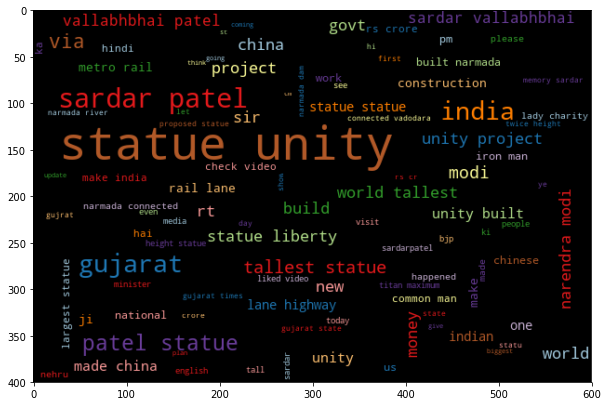

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation='bilinear')

This is a lot of unlikely chatter, and clearly shows that this data is not exactly fit for sentiment analysis. However, that's the challenge, eh?

We see that after the talk of the statue of unity, liberty, and Sardar Patel, there are some talks of the statue made in China, the cost of building, Narendra Modi, and what not. There is also a fair amount of appreciation. This data could really go either way towards positive or negative.

Let's go a bit deep into the data, and visualise it further to get a deeper understanding of it.

Now let's see how the frequencies look like on a countplot:

In [21]:
from nltk import FreqDist

freq_dict = FreqDist(WordPunctTokenizer().tokenize(total_text))
freq_dict

FreqDist({'statue': 624, 'unity': 526, 'patel': 108, 'sardar': 106, 'gujarat': 87, 'india': 86, 'modi': 60, 'world': 55, 'tallest': 43, 'via': 43, ...})

Text(0.5,1,'Top 50 Words in the Total Text Data')

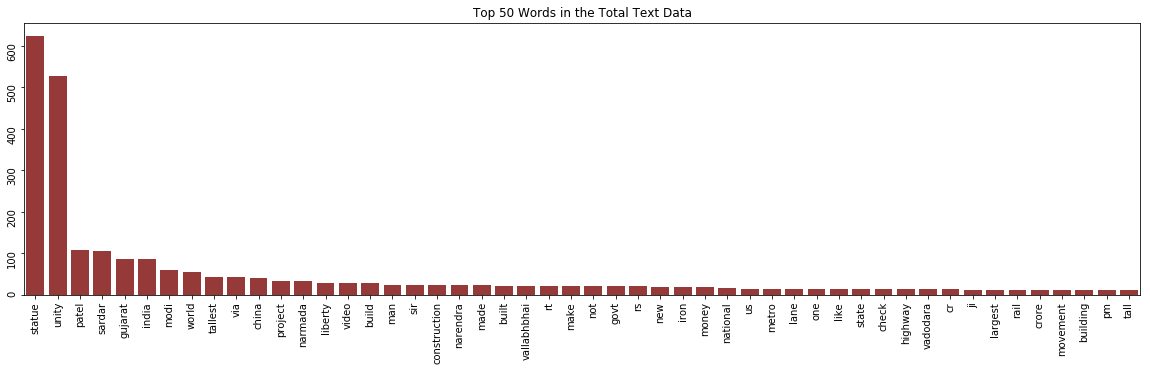

In [22]:
word_dict = dict(freq_dict)
list_tup = sorted(word_dict.items(), key=lambda kv:kv[1], reverse=True)[:50]
x,y = zip(*list_tup)
plt.figure(figsize=(20,5))
sns.barplot(x=list(x), y=list(y),color='brown')
plt.tick_params(labelrotation=90)
plt.title('Top 50 Words in the Total Text Data')

Unsurprisingly, it does not seem to follow Zipf's law, which is due to the fact that we have eliminated stopwords as well as there is a lot of noise(hashtags, for one) in the data. Also, this is a preferential dataset, which influences Zip's law heavily.

## 'Give me Data, and I shall give you the Analysis'

We would be doing two kinds of analyses from the data:
- Knowing popular opinion through the tweets which have been most retweeted, or liked
- Sentiment analysis by identifying tweets as negative, positive or neutral

#### You Can't Sway Me with those Tweets...

Let's have a look at the most popular tweets, and we do that by summing up the retweets and likes columns into one column titled 'Popularity count'.

In [23]:
data['Popularity count'] = data.retweets + data.likes

In [69]:
top20 = data.sort_values('Popularity count', ascending=False).head(20)
top20

,retweets,likes,text,Popularity count
1477,252,100,modi govt make india plan statue unity made china kitna bada jumlebaaz hai yaar ye rt,352
1941,56,51,liberals issues abdul kalam road statue unity imagine celeb names kid nathuram,107
843,39,39,cc since material statue unity imported china,78
1792,15,51,show gratitude govt unveiled giant bronze statue sahityarathi laxminath bezbarua th birth anniversary sep guwahati club rotary bezbaroa symbol unity integrity gave distinct position assamese literature world,66
699,18,40,projectprogress cleaning work carried statue unity raft statueofunity,58
850,29,26,future statue unity sardar patel statue need x protection goons bronze plates china,55
650,18,36,feet india statue unity tallest statue world clearly seen space oblique skysat image captured today november,54
510,18,35,feet india statue unity tallest statue world clearly seen space oblique skysat image captured today november,53
1813,8,25,union minister rajya sabha mp gujarat smt ji visits site statue unity world tallest statue construction featuring sardar vallabhbhai central gujarat earlier today,33
522,8,13,india statue unity dedicated vallabhbhai patel tallest world twice height statue liberty,21


Let's have a look at the keywords that emerged in the top 20 tweets.

In [70]:
total_text = " ".join([text for text in top20.text])
cloud = WordCloud(colormap=plt.get_cmap('Paired'),max_font_size=50,
                  max_words=50,width=600,height=400).generate(total_text)

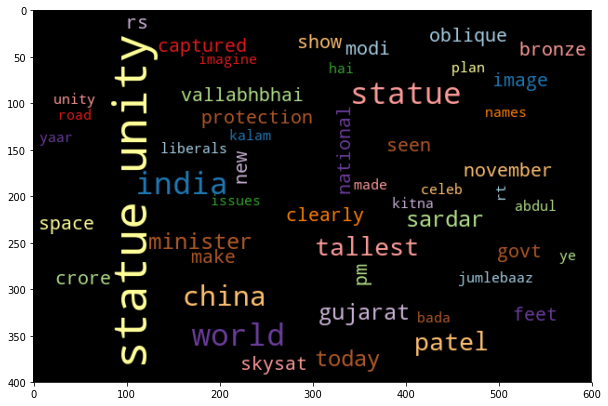

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation='bilinear')

Although we see words implying treachery in the Hindi language, even if those are ignored, there's a strong talk of China, import, issues, etc. However, there is also words like gratitute, unity, tallest, etc which show positive emotion.

Let's import the custom-made sentiment data created by our team and use that for further analysis.

In [27]:
sentiment_data = pd.read_csv('./StatueOfUnity - corrected - Sheet1.csv')

In [28]:
sentiment_data.index = sentiment_data['Unnamed: 0']

In [29]:
sentiment_data = sentiment_data[['sentiment(1-Positive, 2-Neutral, 3-Negative)']]

In [30]:
sentiment_data.rename(columns={'sentiment(1-Positive, 2-Neutral, 3-Negative)':'sentiment'}, inplace=True)

In [31]:
data_with_sentiment = pd.merge(data, sentiment_data, left_index=True, right_index=True)

In [32]:
data_with_sentiment[data_with_sentiment.sentiment.isna()]
data_with_sentiment.dropna(inplace=True)

In [33]:
data_with_sentiment.sentiment = data_with_sentiment.sentiment.astype(int)

In [34]:
data_with_sentiment.sample(10)

,retweets,likes,text,Popularity count,sentiment
1464,0,0,statue unity,0,2
189,0,0,trust mr modi come something like statue unity statue sardar vallabhbhai patel,0,1
355,1,0,metro rail lane highway connect vadodara statue unity via,1,1
1649,0,0,dear r u burning guj tableaux whats wrong guj presents sardar patel statue unity,0,2
999,0,1,pranam sir whts status statue unity former first home minister india wish hve world class impact,1,1
527,0,0,simple solution give women day paid trip statue unity gujarat statue gets visitors women good time police better used sabarimala saved also cost effective,0,3
671,0,0,n way talking statue unity supposedly dream project lord modi ji idiot,0,3
991,1,0,national war memorial ok something called statue unity happened justasking moditakescharge,1,3
990,2,2,okay starting petition statue kevin turvey erected redditch town centre,4,2
49,0,0,let make india pride statue unity,0,1


In [35]:
data_with_sentiment.sentiment.describe()

count    516.000000
mean     2.036822  
std      0.740376  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000  
Name: sentiment, dtype: float64

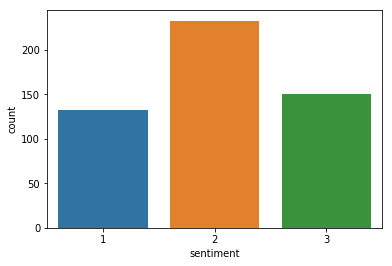

In [36]:
sns.countplot(data=data_with_sentiment,x='sentiment')

The data looks reasonably balanced, since the Neutral sentiment won't be considered for any major purpose.

In the data, a sentiment of 1 is Positive, 2 is Neutral, and 3 is Negative. Let's look at wordclouds for each sentiment.

*NOTE: Neutral sentiment contains all those tweets that were irrelevant to the statue, carried no opinion of their own, or shared pictures of the statue, etc.*

In [37]:
total_text = " ".join([text for text in data_with_sentiment[data_with_sentiment.sentiment == 1].text])
cloud_pos = WordCloud(max_font_size=50, background_color='green',
                  max_words=50,width=600,height=400).generate(total_text)
freq_dict_pos = FreqDist(WordPunctTokenizer().tokenize(total_text))
freq_dict_pos

FreqDist({'statue': 186, 'unity': 134, 'india': 42, 'patel': 41, 'sardar': 37, 'world': 35, 'gujarat': 34, 'tallest': 27, 'narmada': 20, 'build': 17, ...})

In [38]:
total_text = " ".join([text for text in data_with_sentiment[data_with_sentiment.sentiment == 2].text])
cloud_neu = WordCloud(max_font_size=50, background_color='white',
                  max_words=50,width=600,height=400).generate(total_text)
freq_dict_neu = FreqDist(WordPunctTokenizer().tokenize(total_text))
freq_dict_neu

FreqDist({'statue': 269, 'unity': 234, 'sardar': 46, 'patel': 42, 'gujarat': 37, 'india': 30, 'via': 25, 'video': 19, 'modi': 18, 'new': 16, ...})

In [39]:
total_text = " ".join([text for text in data_with_sentiment[data_with_sentiment.sentiment == 3].text])
cloud_neg = WordCloud(max_font_size=50,background_color='darkred',
                  max_words=50,width=600,height=400).generate(total_text)
freq_dict_neg = FreqDist(WordPunctTokenizer().tokenize(total_text))
freq_dict_neg

FreqDist({'statue': 168, 'unity': 157, 'china': 32, 'modi': 26, 'patel': 25, 'sardar': 23, 'gujarat': 16, 'made': 16, 'india': 14, 'project': 13, ...})

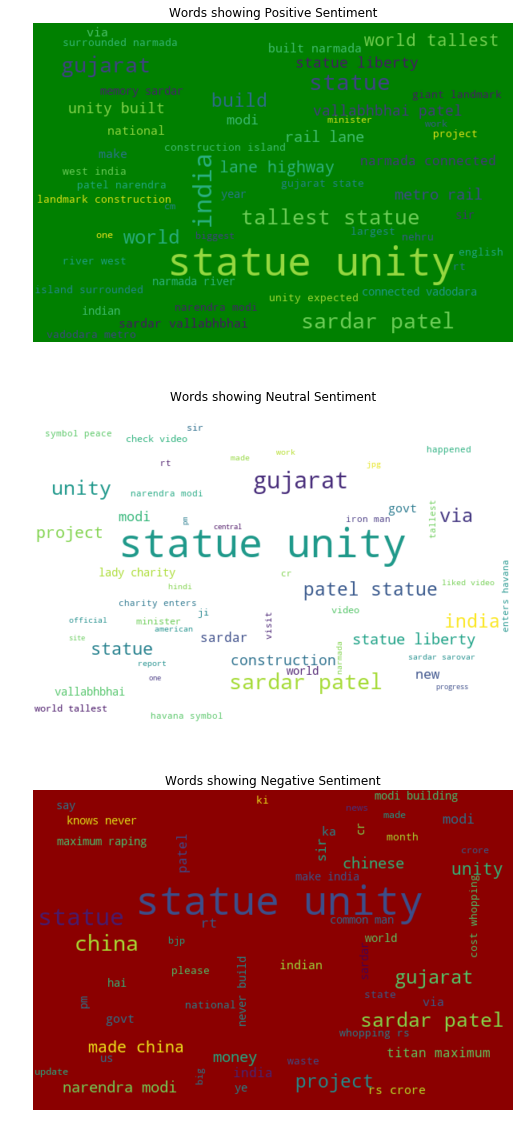

In [40]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(3,1,1)
ax1.imshow(cloud_pos, interpolation='bilinear')
ax1.set_title('Words showing Positive Sentiment')
ax1.set_axis_off()
ax2 = fig.add_subplot(3,1,2)
ax2.imshow(cloud_neu, interpolation='bilinear')
ax2.set_title('Words showing Neutral Sentiment')
ax2.set_axis_off()
ax3 = fig.add_subplot(3,1,3)
ax3.imshow(cloud_neg, interpolation='bilinear')
ax3.set_title('Words showing Negative Sentiment')
ax3.set_axis_off()

Already, we begin to see the difference in words showing positive and negative sentiments, with positive comments praising how tall the statue is, as well as its location, etc. The negative tweets focus more on the high cost, the false rumor of it being built in China, etc. Let's also look at the frequency distribution plots of words. 

In [41]:
def make_freq_plot(freq_dict, title, no_of_words=50):
    word_dict = dict(freq_dict)
    list_tup = sorted(word_dict.items(), key=lambda kv:kv[1], reverse=True)[:no_of_words]
    x,y = zip(*list_tup)
    plt.figure(figsize=(20,5))
    sns.barplot(x=list(x), y=list(y),color='brown')
    plt.tick_params(labelrotation=90)
    plt.title(title)

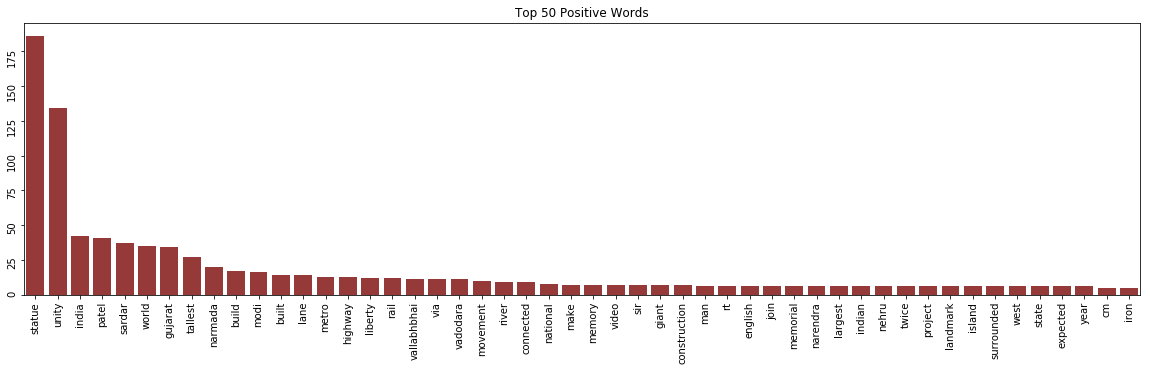

In [42]:
make_freq_plot(freq_dict_pos, 'Top 50 Positive Words', 50)

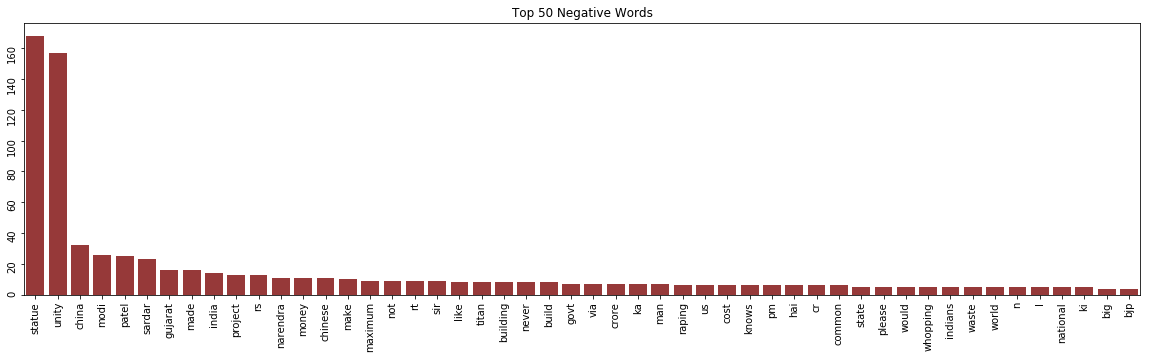

In [43]:
make_freq_plot(freq_dict_neg, 'Top 50 Negative Words', 50)

Tsk tsk. The same culprits, as we predicted. All so much for believing in rumors, eh?

Let's also examine bigrams and see how that affects these plots.

In [44]:
total_text = " ".join([text for text in data_with_sentiment[data_with_sentiment.sentiment == 1].text])
tokens = nltk.word_tokenize(total_text)
bigrams = nltk.bigrams(tokens)
freq_dict_pos = FreqDist(bigrams)
#make_freq_plot(freq_dict_pos, 'Top 50 Positive Words', 50)

Text(0.5,1,'Top 50 Positive Bigrams')

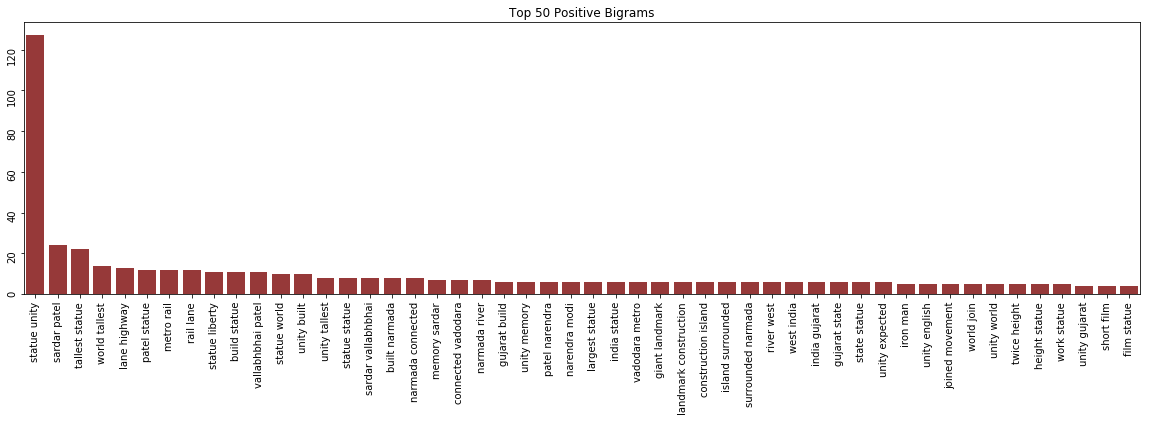

In [45]:
word_dict = dict(freq_dict_pos)
list_tup = sorted(word_dict.items(), key=lambda kv:kv[1], reverse=True)[:50]
x,y = zip(*list_tup)
x = [item[0] + ' ' + item[1] for item in x]
plt.figure(figsize=(20,5))
sns.barplot(x=list(x), y=list(y),color='brown')
plt.tick_params(labelrotation=90)
plt.title('Top 50 Positive Bigrams')

Text(0.5,1,'Top 50 Negative Bigrams')

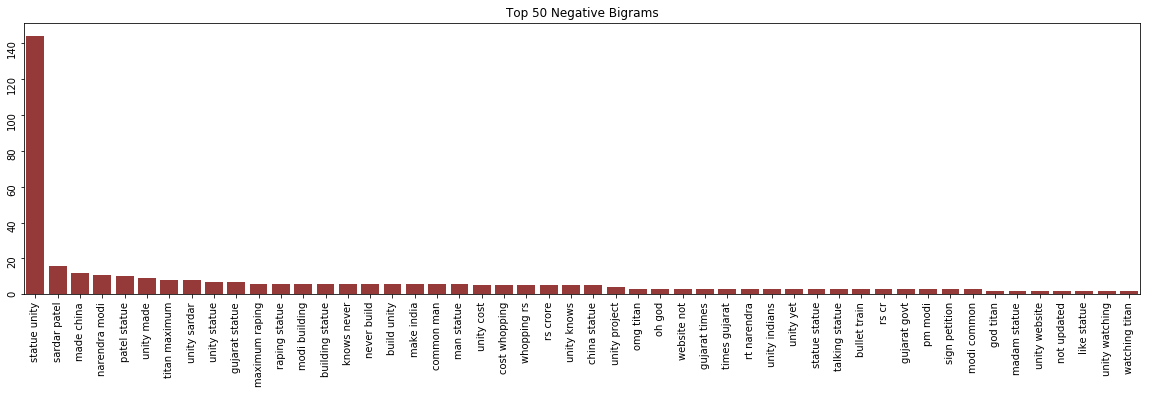

In [46]:
total_text = " ".join([text for text in data_with_sentiment[data_with_sentiment.sentiment == 3].text])
tokens = nltk.word_tokenize(total_text)
bigrams = nltk.bigrams(tokens)
freq_dict_pos = FreqDist(bigrams)
#make_freq_plot(freq_dict_pos, 'Top 50 Positive Words', 50)
word_dict = dict(freq_dict_pos)
list_tup = sorted(word_dict.items(), key=lambda kv:kv[1], reverse=True)[:50]
x,y = zip(*list_tup)
x = [item[0] + ' ' + item[1] for item in x]
plt.figure(figsize=(20,5))
sns.barplot(x=list(x), y=list(y),color='brown')
plt.tick_params(labelrotation=90)
plt.title('Top 50 Negative Bigrams')

Again, the expected culprits.

## Will it predict, or will it not, that is the question...

Until now, we don't have much hopes that this data can be used well for prediction purposes because there aren't many defining words for separating the positives from the negatives. Both sets look quite similar. Plus, there is high use of sarcasm, etc which can't be picked up by non-contextual predictions like we're going to attempt.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

Let's remove the Neutral sentiment data and then feed it into the model.

In [48]:
final_data = data_with_sentiment[data_with_sentiment.sentiment != 2]
final_data.sentiment.mean()

2.067137809187279

In [49]:
final_data.shape

(283, 5)

We will use the Bag-of-Words approach for making predictions into the model. For that, we will use TF-IDF Vectorizer(CountVectorizer was tested and gave generally inferior results) as well as a number of algorithms to see which one performs the best, including NaiveBayes algorithms, since they are well proven on Text datasets.

#### Using unigrams

In [50]:
vect = TfidfVectorizer()

In [51]:
X = vect.fit_transform(final_data.text)

In [52]:
X.shape

(283, 1144)

Hence, the vectorizer has identified 1144 unique keywords in the dataset.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, final_data.sentiment, random_state=42)

Let's use NaiveBayes first, and move from there.

In [54]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

We won't perform any hyperparameter tuning for any algorithm, for now.

Data is uniformly distributed, so accuracy_score would be a good enough evaluation parameter.

In [55]:
from sklearn.metrics import accuracy_score
def predict_accuracy_score(clf):
    clf = clf()
    clf.fit(X_train.toarray(), y_train)
    predictions = clf.predict(X_test.toarray())
    return accuracy_score(predictions, y_test)

In [56]:
CLASSIFIERS_TO_USE = [GaussianNB, MultinomialNB, LogisticRegression,
                      SVC, RandomForestClassifier, GradientBoostingClassifier, MLPClassifier]

In [57]:
scores = []
for clf in CLASSIFIERS_TO_USE:
    scores.append((clf.__name__, predict_accuracy_score(clf)))

Let's have a look at which Classifier performed the best:

In [58]:
scores

[('GaussianNB', 0.7323943661971831),
 ('MultinomialNB', 0.8591549295774648),
 ('LogisticRegression', 0.7746478873239436),
 ('SVC', 0.5352112676056338),
 ('RandomForestClassifier', 0.7464788732394366),
 ('GradientBoostingClassifier', 0.7464788732394366),
 ('MLPClassifier', 0.8028169014084507)]

In [59]:
x, y = zip(*scores)

Text(0.5,1,'Performance of various Classifiers on the Tweet data(Unigrams)')

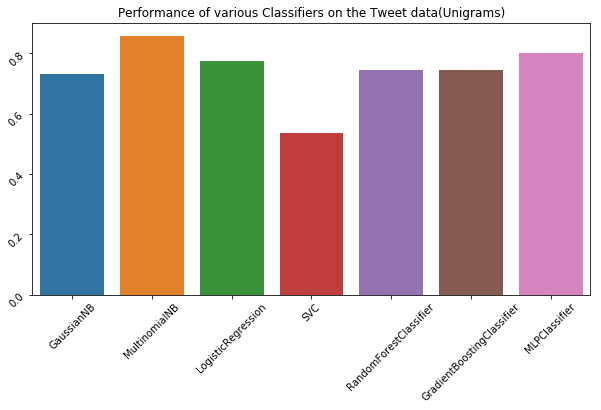

In [60]:
plt.figure(figsize=(10,5))
plt.tick_params(labelrotation=45)
sns.barplot(x=list(x), y=y)
plt.title('Performance of various Classifiers on the Tweet data(Unigrams)')

Without tuning, the Multinomial Naive Bayes performs the best, giving us an accuracy of ~86% on our test set. This further confirms the fact that NB works good on textual data.

#### Using bigrams

In [61]:
vect = TfidfVectorizer(ngram_range=(1,2))

In [62]:
X = vect.fit_transform(final_data.text)
X_train, X_test, y_train, y_test = train_test_split(X, final_data.sentiment, random_state=42)
scores = []
for clf in CLASSIFIERS_TO_USE:
    scores.append((clf.__name__, predict_accuracy_score(clf)))

In [63]:
scores

[('GaussianNB', 0.7323943661971831),
 ('MultinomialNB', 0.7746478873239436),
 ('LogisticRegression', 0.7323943661971831),
 ('SVC', 0.5352112676056338),
 ('RandomForestClassifier', 0.7183098591549296),
 ('GradientBoostingClassifier', 0.7183098591549296),
 ('MLPClassifier', 0.7887323943661971)]

Text(0.5,1,'Performance of various Classifiers on the Tweet data(Bigrams)')

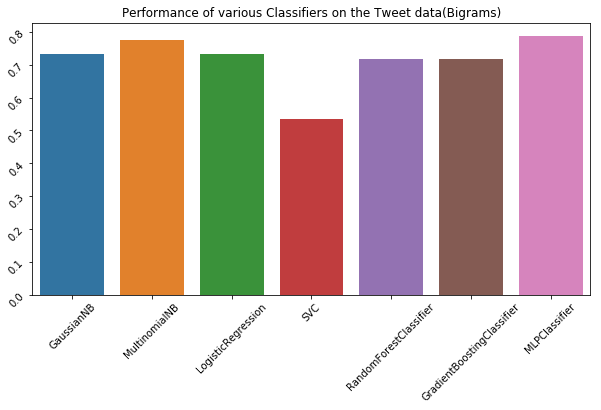

In [64]:
x, y = zip(*scores)
plt.figure(figsize=(10,5))
plt.tick_params(labelrotation=45)
sns.barplot(x=list(x), y=y)
plt.title('Performance of various Classifiers on the Tweet data(Bigrams)')

In this case, the MLP Classifier edges out the MultinomialNB by a percent(~79%).

#### Using trigrams

In [65]:
vect = TfidfVectorizer(ngram_range=(1,3))

In [66]:
X = vect.fit_transform(final_data.text)
X_train, X_test, y_train, y_test = train_test_split(X, final_data.sentiment, random_state=42)
scores = []
for clf in CLASSIFIERS_TO_USE:
    scores.append((clf.__name__, predict_accuracy_score(clf)))

In [67]:
scores

[('GaussianNB', 0.7464788732394366),
 ('MultinomialNB', 0.8028169014084507),
 ('LogisticRegression', 0.7183098591549296),
 ('SVC', 0.5352112676056338),
 ('RandomForestClassifier', 0.7464788732394366),
 ('GradientBoostingClassifier', 0.7323943661971831),
 ('MLPClassifier', 0.7746478873239436)]

Text(0.5,1,'Performance of various Classifiers on the Tweet data(Trigrams)')

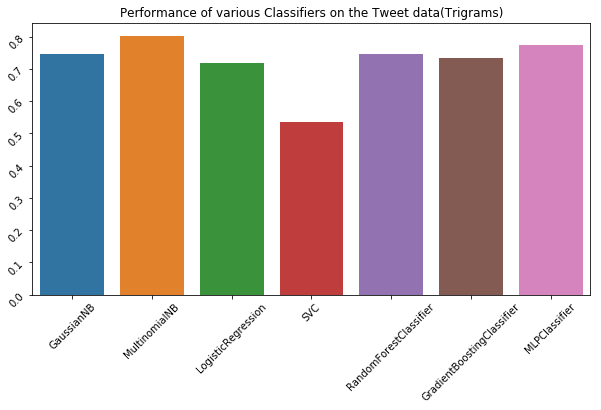

In [68]:
x, y = zip(*scores)
plt.figure(figsize=(10,5))
plt.tick_params(labelrotation=45)
sns.barplot(x=list(x), y=y)
plt.title('Performance of various Classifiers on the Tweet data(Trigrams)')

MultinomialNB again performs the best(~80%).

However, using unigrams gives us the highest accuracy out of all three.

## Conclusion

We, hence, successfully mined Twitter data, manually tagged sentiments for training data, and then used that data to carry various kinds of textual analysis. 

We cleaned the data using Regular expressions, and then plotted various visualisations to get a better picture of it. We analyzed tweets based on their popularity, and finally carried out predictions based on their sentiments conveyed using a BoW model.

The following points were observed during and after the predictions:
- Using TF-IDF was most beneficial for calculating the frequency matrix, since it normalized words based on their commonality in all documents.
- Using a unigram model gave the best predictions.
- MultinomialNB was the most consistent performer.

Two points that one should keep in mind:
- The algorithms tested were not tuned for hyperparameters.
- We used accuracy_score for evaluation, since the data was pretty well balanced.

This analysis is far from over, since we haven't tuned hyperparameters(which could squeeze out a percent or two more accuracy I hope), and of course, I might not have been creative enough in analyzing the whole breadth of the text. Even then, I was intrigued by how well the model has performed without any tuning on such an ambiguous data. The data even after cleaning has a mixture of Hindi words along with English ones, and, interestingly enough, most of the Hindi tweets, I noticed later, are either neutral, or negative(a great comment on human psychology). Maybe that too helped the model in classifying the tweets as positive or negative.

## References

1. https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90 (The first 3 parts of this one were a huge influence)
2. https://scikit-learn.org/stable/modules/naive_bayes.html
3. https://scikit-learn.org/stable/modules/feature_extraction.html
3. https://www.datacamp.com/community/tutorials/wordcloud-python